In [63]:
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression

In [64]:
df = pd.read_csv('shoe.csv')
df['class(y)'] = df['class(y)'].replace(['Female','Male'],[0,1])
df.head()

,size(cm),class(y)
0,9.500,0
1,10.125,1
2,10.410,1
3,9.810,0
4,11.050,1


<Axes: xlabel='size(cm)', ylabel='class(y)'>

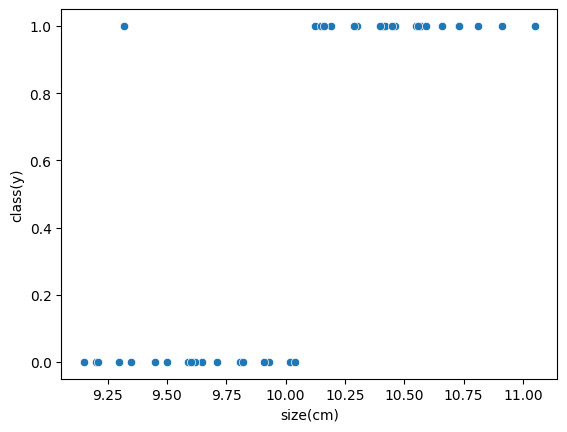

In [65]:
sns.scatterplot(data = df,x = 'size(cm)', y = 'class(y)') #0=female , 1 = male

In [66]:
x=df.drop('class(y)', axis=1)
y=df[['class(y)']]

In [67]:
lr = LogisticRegression()
lr.fit(x,y)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [68]:
m = float(lr.coef_)
c = float(lr.intercept_)

In [69]:
lr_pred = lr.predict(x)
lr_pred

array([0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0], dtype=int64)

In [70]:
lr.predict_proba(x)

array([[0.77302845, 0.22697155],
       [0.39738242, 0.60261758],
       [0.2377457 , 0.7622543 ],
       [0.6013567 , 0.3986433 ],
       [0.05486986, 0.94513014],
       [0.8951951 , 0.1048049 ],
       [0.79524583, 0.20475417],
       [0.17003227, 0.82996773],
       [0.66235827, 0.33764173],
       [0.69665958, 0.30334042],
       [0.59504263, 0.40495737],
       [0.23301782, 0.76698218],
       [0.35729164, 0.64270836],
       [0.07737361, 0.92262639],
       [0.17757582, 0.82242418],
       [0.11860381, 0.88139619],
       [0.46492055, 0.53507945],
       [0.52395197, 0.47604803],
       [0.29398481, 0.70601519],
       [0.16274575, 0.83725425],
       [0.38176611, 0.61823389],
       [0.83473184, 0.16526816],
       [0.88221669, 0.11778331],
       [0.1392146 , 0.8607854 ],
       [0.71305157, 0.28694843],
       [0.21476669, 0.78523331],
       [0.2994667 , 0.7005333 ],
       [0.09833362, 0.90166638],
       [0.2192301 , 0.7807699 ],
       [0.11860381, 0.88139619],
       [0.

In [71]:
def sigmoid(x,m,c):
    e = 2.71828
    regressor = m*x + c
    if (1/(1+ e**(- regressor))) > .5: return 1
    return 0

In [72]:
count = 0
for i in range(0,39):
    pred = sigmoid(x['size(cm)'][i],m,c)
    print(pred)
    if pred == y['class(y)'][i]: count=count+1

0
1
1
0
1
0
0
1
0
0
0
1
1
1
1
1
1
0
1
1
1
0
0
1
0
1
1
1
1
1
1
0
1
0
1
0
0
1
0


In [73]:
accuracy_sigmoid = count_sigmoid*100/df.shape[0]
print(f'Accuracy = {accuracy_sigmoid}%')

Accuracy = 92.5%
